<a href="https://colab.research.google.com/github/Ahmad10Raza/Waste-Classifier-WebApp/blob/master/Garbage_and_Waste_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Garbage and Waste Classifier Using DL**


## **Problem Statement:**

The "Garbage and Waste Classifier Using Deep Learning" project aims to address the pressing issue of improper waste management and recycling by developing an accurate and efficient deep learning system that can classify various types of waste and garbage items.

## **Problem Description:**

Improper disposal and mismanagement of waste and garbage have detrimental effects on the environment, public health, and sustainability. Inadequate waste sorting and recycling practices contribute to pollution, landfill overflow, and resource depletion. To mitigate these problems, there is a critical need for a highly accurate and automated system that can identify and classify different types of waste and garbage items.

The objective of this project is to create a robust deep learning-based classification system that can accurately categorize waste and garbage items into various classes such as plastics, glass, paper, organic waste, metals, and more. The system will be capable of distinguishing between recyclable and non-recyclable materials, as well as identifying hazardous waste items that require special disposal methods.

**Key Challenges:**

1. **Variability in Waste Types:** Garbage and waste items come in a wide range of shapes, sizes, colors, and materials. Developing a classifier that can handle this variability is a significant challenge.

2. **Data Collection and Labeling:** Gathering a diverse and extensive dataset of waste items with accurate labels is crucial for training the deep learning model.

3. **Real-time Classification:** The system should be capable of classifying waste items in real-time or with minimal latency to be practical for use in waste sorting facilities or mobile applications.

4. **Environmental Conditions:** The system should be robust to environmental conditions such as varying lighting, humidity, and occlusions that are typically encountered in waste sorting facilities.

5. **Cost-Effective Hardware:** Designing an affordable hardware setup, possibly utilizing cameras and sensors, to capture waste item images is vital for practical implementation.

**Significance:**

The successful development of a "Garbage and Waste Classifier Using Deep Learning" system has the potential to significantly improve waste management practices. It can enhance the efficiency of waste sorting and recycling facilities, promote environmentally responsible behaviors, and contribute to a cleaner and more sustainable environment.

This project will not only have immediate practical applications in waste management but also raise awareness about the importance of proper waste disposal and recycling, ultimately leading to a more sustainable and eco-friendly society.


# Importing Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
import sklearn
import tensorflow as tf
from tensorflow import keras
from PIL import Image as im
from glob import glob
from sklearn.model_selection import train_test_split
import keras
#from tf.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from PIL import Image as im
import cv2

**The code below provided is a function called seed_everything(), which sets the seeds for the random number generators in Python, NumPy, TensorFlow, and the operating system. This is done to make the experiment more reproducible, meaning that if you run the code again with the same seed, we will get the same results**

In [4]:
# Set seeds to make the experiment more reproducible.
import random

def seed_everything(seed = 0):
    """Sets the seeds for the random number generators in Python, NumPy, TensorFlow, and the operating system.

    Args:
        seed: The seed to use.
    """

    # Set the Python random seed.
    random.seed(seed)

    # Set the NumPy random seed.
    np.random.seed(seed)

    # Set the TensorFlow random seed.
    tf.random.set_seed(seed)

    # Set the operating system random seed.
    os.environ['PYTHONHASHSEED'] = str(seed)

# Set the seed to 0.
seed = 0

# Call the seed_everything() function with the seed.
seed_everything(seed)


# Loading Datasets

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
import os

data_path="/content/drive/MyDrive/Colab Notebooks/DS_PROJECT/Waste-Classifier-WebApp/Data/image"
os.listdir(data_path)

['train', 'test']

In [9]:
input_path=data_path
train_data_dir=input_path + '/' + 'train'
test_data_dir=input_path + '/' + 'test'

In [10]:
BATCH_SIZE=64
img_height=244
img_width=244

#### preparing for training datasets

In [12]:
train_ds=tf.keras.utils.image_dataset_from_directory(
    train_data_dir,validation_split=0.2,
    subset='training',label_mode='categorical',
    image_size=(img_height,img_width),
    batch_size=BATCH_SIZE,
    seed=123
)

Found 2187 files belonging to 7 classes.
Using 1750 files for training.


In [13]:
validation_ds = tf.keras.utils.image_dataset_from_directory(
    train_data_dir,
    validation_split = 0.2,
    subset = 'validation',
    label_mode = 'categorical',
    image_size = (img_height, img_width),
    batch_size = BATCH_SIZE,
    seed = 123
  )

Found 2187 files belonging to 7 classes.
Using 437 files for validation.


In [15]:
class_names=train_ds.class_names
print(class_names)

['cardboard', 'compost', 'glass', 'metal', 'paper', 'plastic', 'trash']


# Data Visualization

In [16]:
plt.style.use('dark_background')

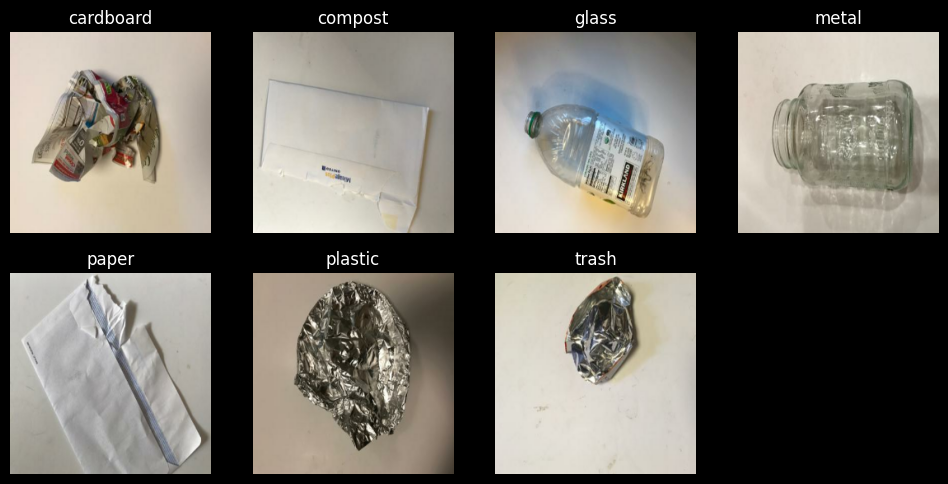

In [17]:
plt.figure(figsize=(12,12))
for img,label in train_ds.take(1):
  for i in range(len(class_names)):
    ax=plt.subplot(4,4,i+1)
    plt.imshow(img[i].numpy().astype('uint8'))
    plt.title(class_names[i])
    plt.axis('off')

**The code below provided is a sequence of Keras layers that can be used for image data augmentation. Data augmentation is a technique that can be used to increase the size and diversity of a training dataset by creating new images from existing images. This can help to improve the performance of machine learning models, especially when the training dataset is small.**

In [18]:
data_augmentation = keras.Sequential([
    #layers.CenterCrop(125, 125),
    layers.RandomFlip('horizontal', input_shape = (img_height, img_width, 3)),
    layers.RandomRotation(0.2, fill_mode = 'nearest'),
    layers.RandomZoom(0.1),
])


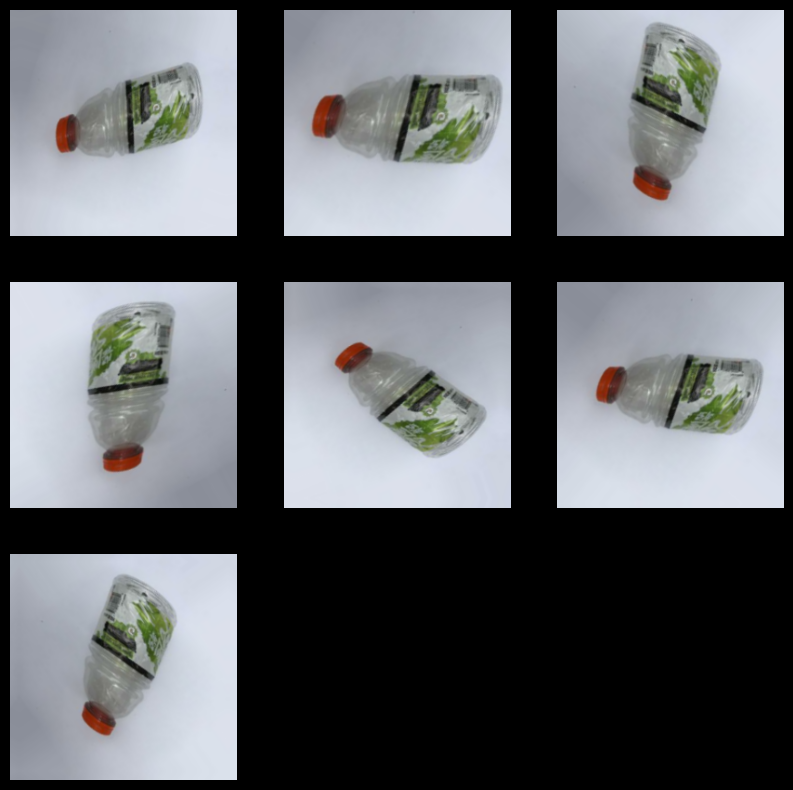

In [19]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(len(class_names)):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
   # plt.title(class_names[2])
    plt.axis("off")

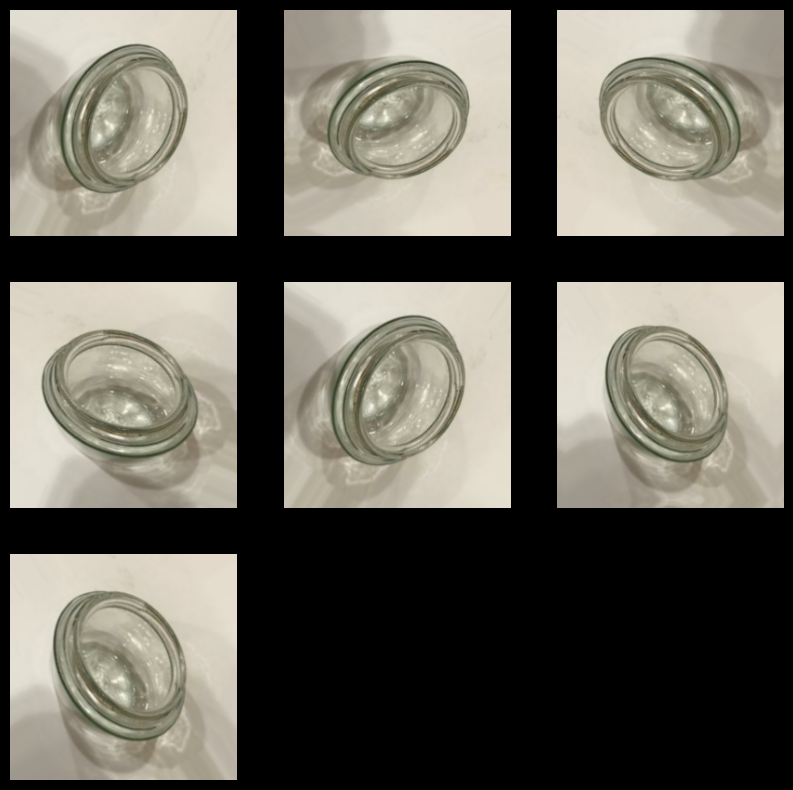

In [20]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(len(class_names)):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
   # plt.title(class_names[2])
    plt.axis("off")

**The code below provided is used to prefetch the training and validation datasets. Prefetching is a technique that can be used to improve the performance of machine learning models by loading data into memory in advance. This can help to reduce the time it takes to train the model, especially when the dataset is large.**

In [21]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = AUTOTUNE)
validation_ds = validation_ds.cache().prefetch(buffer_size = AUTOTUNE)

# Model Architecture

## VGG-16 Base Model

VGG-16, short for "Visual Geometry Group 16-layer," is a convolutional neural network (CNN) architecture designed for image classification. It was developed by the Visual Geometry Group at the University of Oxford and is known for its simplicity and effectiveness. VGG-16 is part of the VGG family of models, which includes various configurations with different numbers of layers, but VGG-16 specifically consists of 16 weight layers, including 13 convolutional layers and 3 fully connected layers.

Key characteristics of the VGG-16 architecture:

1. **Architecture:** VGG-16 comprises a stack of convolutional layers, followed by max-pooling layers, and concludes with fully connected layers. The network architecture is relatively deep, and it uses 3x3 convolutional filters with a stride of 1 and 2x2 max-pooling with a stride of 2.

2. **Uniform Convolutional Layers:** One notable feature of VGG-16 is its uniform use of 3x3 convolutional filters. The repeated use of these small filters allows the network to learn a wide range of image features at different scales.

3. **Depth:** VGG-16 is considered deep for its time (2014), with 13 convolutional layers. The depth of the network aids in capturing complex hierarchical features.

4. **Fully Connected Layers:** The convolutional layers are followed by three fully connected layers, with the last fully connected layer producing the final classification output.

5. **ReLU Activation Function:** Rectified Linear Units (ReLU) are used as activation functions throughout the network, promoting faster convergence during training.

VGG-16 was trained on the ImageNet dataset, a large dataset with millions of labeled images from thousands of categories. As a result, it achieved state-of-the-art performance on various image classification tasks at the time of its introduction.

While VGG-16 is a powerful architecture for image classification, it has a relatively high number of parameters, making it computationally expensive to train and deploy. More recent CNN architectures, like those in the ResNet and Inception families, have addressed some of the limitations of VGG by introducing skip connections and more efficient architectures. However, VGG-16 remains a valuable reference point and is often used as a base model for transfer learning in computer vision tasks. Researchers and practitioners may take the pre-trained VGG-16 model and fine-tune it on their specific image classification tasks to leverage its learned features.

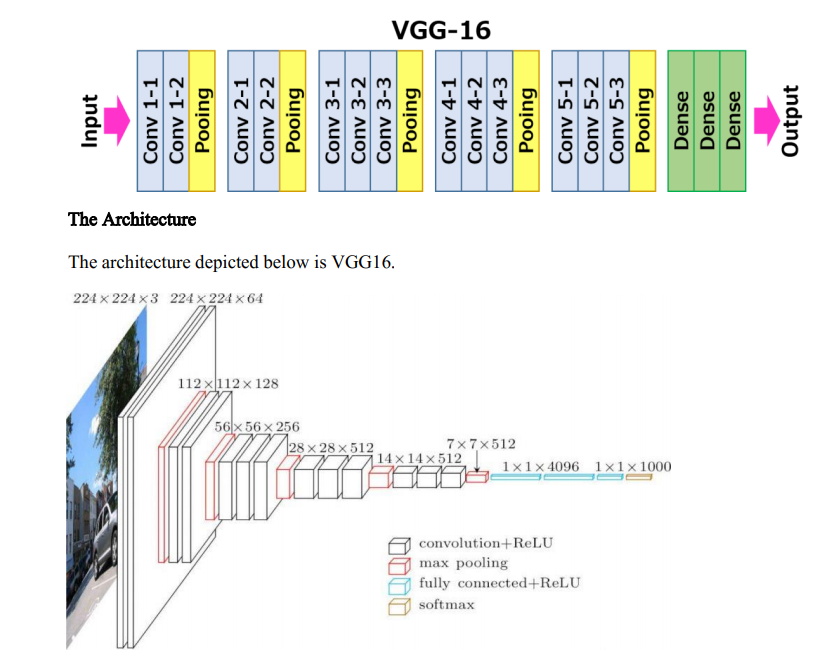

In [1]:
from PIL import Image
from IPython.display import display
img1=Image.open("Data/VGG_16_Architecture.png")
img1=img1.convert('RGB')
display(img1)

## Architecture and Working..
The VGG-16 architecture is a widely recognized convolutional neural network (CNN) designed for image classification. It was introduced by the Visual Geometry Group (VGG) at the University of Oxford and is known for its simplicity and effectiveness. Here's an overview of its architecture and how it works:

**Architecture:**
The VGG-16 architecture consists of 16 layers, including 13 convolutional layers and 3 fully connected layers. It is characterized by its uniform use of small 3x3 convolutional filters and 2x2 max-pooling layers. The network progressively reduces spatial dimensions and increases the depth as you move through the layers. Below is a breakdown of the architecture:

1. **Input Layer:** VGG-16 takes an RGB image as input with a fixed size, typically 224x224 pixels.

2. **Convolutional Layers:** The initial layers consist of two or more stacked 3x3 convolutional layers, followed by a 2x2 max-pooling layer to reduce the spatial dimensions. These layers are designed to capture low-level features such as edges and simple textures.

3. **Intermediate Convolutional Layers:** VGG-16 repeats this pattern of 3x3 convolutional layers and max-pooling layers multiple times, increasing the depth and allowing the network to learn more complex and abstract features.

4. **Fully Connected Layers:** After the convolutional layers, there are three fully connected layers. These layers perform high-level feature extraction and produce the final classification output. The last fully connected layer typically has as many neurons as there are classes in the classification task, and it is activated using the softmax function to produce class probabilities.

5. **Softmax Layer:** The final layer of the network is a softmax layer that assigns class probabilities to the input image based on the output of the previous fully connected layer.

**Working:**
The VGG-16 network works by passing the input image through the layers sequentially, extracting and transforming features at each layer. Here's how it operates:

1. **Forward Propagation:** When an image is fed into the VGG-16 network, it undergoes a series of convolution operations, followed by activation functions (typically ReLU), and max-pooling operations. This process continues through the convolutional layers, gradually reducing the spatial dimensions while increasing the depth.

2. **Feature Extraction:** The convolutional layers learn to recognize various features, starting with simple shapes and edges in the early layers and progressing to more complex patterns and textures in the deeper layers.

3. **Flattening:** After the convolutional layers, the feature maps are flattened into a 1D vector, which is then passed through the fully connected layers.

4. **Classification:** The fully connected layers perform high-level feature extraction and classification. The output of the last fully connected layer is used to produce class probabilities through the softmax activation function.

5. **Prediction:** The class with the highest probability in the softmax output is considered the predicted class for the input image.

Training a VGG-16 model typically involves using a large labeled dataset, such as ImageNet, and backpropagation to adjust the model's weights and biases to minimize the classification error. Once trained, the model can be used for image classification tasks. Additionally, it's often employed as a base model for transfer learning, where the pre-trained VGG-16 model is fine-tuned on a specific dataset for a particular image classification task, leveraging the learned features from the earlier layers.

In [22]:
IMG_SHAPE=(img_height,img_width,3)

base_model=tf.keras.applications.VGG16(
    input_shape=IMG_SHAPE,
    include_top=False,
    weights='imagenet'
)

base_model.summary()

58889256/58889256 [==============================] - 1s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 244, 244, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 244, 244, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 244, 244, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 122, 122, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 122, 122, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 122, 122, 128)     147584    
                                                              

In [28]:
def print_layer_trainable():
  for l in base_model.layers:
    print("{0}:\t==>\t{1}".format(l.trainable,l.name))

In [29]:
print_layer_trainable()

True:	==>	input_1
True:	==>	block1_conv1
True:	==>	block1_conv2
True:	==>	block1_pool
True:	==>	block2_conv1
True:	==>	block2_conv2
True:	==>	block2_pool
True:	==>	block3_conv1
True:	==>	block3_conv2
True:	==>	block3_conv3
True:	==>	block3_pool
True:	==>	block4_conv1
True:	==>	block4_conv2
True:	==>	block4_conv3
True:	==>	block4_pool
True:	==>	block5_conv1
True:	==>	block5_conv2
True:	==>	block5_conv3
True:	==>	block5_pool


# **To Be Continue...**